In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns; sns.set()
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/FINAL/EMS2021final.xlsx' # Đường dẫn đã được cập nhật
data = pd.read_excel(file_path)

Mounted at /content/drive


In [3]:
def Missing_values(data):
    '''
    Find missing values of the dataframe.

    Parameters
    ----------
    data : DataFrame

    Returns
    -------
    None.
    Print a dataframe with missing values and their percentage.

    '''
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent > 0)],'\n' )

In [4]:
Missing_values(data)

          Total  Pourcentage
EBITIC      206     0.175021
OCFCAPEX    115     0.097706
EVR          14     0.011895
SUPPAY        5     0.004248
BPE           3     0.002549
OCFTL         1     0.000850 



In [5]:
data.reset_index(inplace=True,drop=True)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None )

In [7]:
data_cap=data.copy()

In [8]:
from scipy import stats
def percentile_capping(data, cols, from_low_end, from_high_end):
  for col in cols:
    # lower_bound = data[col].quantile(from_low_end)
    # upper_bound = data[col].quantile(1- from_high_end)

    # data[col] = np.where(data[col] < from_low_end, lower_bound, data[col])
    # data[col] = np.where(data[col] > from_high_end, from_high_end, data[col])

    lower_bound = data[col].quantile(from_low_end)
    upper_bound = data[col].quantile(from_high_end)
    stats.mstats.winsorize(a = data[col], limits = [from_low_end, from_high_end], inplace = True)

In [9]:
percentile_capping(data_cap, ['WCTA','RETA','EBITTA','BVETL','ASSETURN','CR','STDTA','LTDTA','OCFCAPEX',	'EVR','MVETL','SUPPAY','BPE','OCFTL','FL','EBITIC'], 0.10, 0.10)

In [10]:
corr = data_cap.corr()
corr.style.background_gradient(cmap='coolwarm')

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,EBITTA,OCFTL,OCFCAPEX,BPE,EVR,Financial Situation
MVETL,1.000000,0.756845,0.407336,0.150337,-0.127553,0.303262,0.595917,-0.449080,-0.226276,-0.512673,0.143823,0.157089,0.306915,0.035052,0.098839,0.316414,-0.425437
BVETL,0.756845,1.000000,0.560396,0.156724,-0.196674,0.326597,0.799433,-0.537053,-0.302580,-0.645451,0.144299,0.055770,0.293925,0.056085,0.079630,0.190381,-0.529607
WCTA,0.407336,0.560396,1.000000,0.333566,0.108727,0.236827,0.796156,-0.402563,-0.370807,-0.414903,0.117253,0.148047,0.090447,0.009024,0.090769,-0.128794,-0.597047
RETA,0.150337,0.156724,0.333566,1.000000,0.202357,0.152912,0.201778,-0.292109,-0.180551,-0.169016,0.108519,0.195362,0.258440,-0.028600,-0.027596,-0.246210,-0.289052
ASSETURN,-0.127553,-0.196674,0.108727,0.202357,1.000000,0.271929,-0.122826,0.198797,-0.241182,0.133418,0.030046,0.346320,-0.002547,-0.128085,-0.060179,-0.609088,-0.026035
SUPPAY,0.303262,0.326597,0.236827,0.152912,0.271929,1.000000,0.296733,-0.130761,-0.133023,-0.246363,-0.002664,0.212458,0.184736,-0.040233,0.016727,-0.099788,-0.237937
CR,0.595917,0.799433,0.796156,0.201778,-0.122826,0.296733,1.000000,-0.506633,-0.256204,-0.508925,0.159050,0.064138,0.180127,0.046845,0.105598,0.106587,-0.523129
STDTA,-0.449080,-0.537053,-0.402563,-0.292109,0.198797,-0.130761,-0.506633,1.000000,0.056660,0.452968,-0.092803,-0.053570,-0.311027,-0.027010,-0.077128,-0.130125,0.436073
LTDTA,-0.226276,-0.302580,-0.370807,-0.180551,-0.241182,-0.133023,-0.256204,0.056660,1.000000,0.240215,-0.058116,0.059295,-0.037769,-0.101052,-0.006775,0.271196,0.287648
FL,-0.512673,-0.645451,-0.414903,-0.169016,0.133418,-0.246363,-0.508925,0.452968,0.240215,1.000000,-0.073904,-0.125609,-0.249727,-0.078365,-0.008257,-0.171737,0.530790


In [11]:
y = data_cap['Financial Situation']
X = data_cap.drop(['Financial Situation'],axis=1)

In [12]:
data

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,EBITTA,OCFTL,OCFCAPEX,BPE,EVR,Financial Situation
0,0.732228,0.822739,0.212467,0.184233,1.279282,5.707278,1.387272,0.000000,0.000000,2.215452,NaN,0.064634,0.230915,24.420941,117.447008,0.176669,0
1,0.510239,1.197411,0.207030,0.198628,1.414840,20.552961,1.631340,0.218110,0.117488,1.835135,2.426955,0.039624,0.097389,-0.797216,8.868327,0.331361,0
2,7.854911,5.259951,0.658280,0.031920,1.255183,8.933055,5.120803,0.000000,0.000000,1.190116,2397.255829,0.169988,0.682708,169.591947,8.374683,0.975984,0
3,0.267332,0.416696,0.154382,0.063919,0.791592,12.967474,1.235847,0.315868,0.050321,3.399830,3.376471,0.063281,0.089313,1.801569,4.485941,0.671313,1
4,1.669166,1.633414,0.329095,0.091293,1.421209,47.859363,1.866691,0.349157,0.000000,1.612215,-4.501464,-0.045172,-0.784115,-14.810016,20.375426,0.747980,1
5,0.425446,0.436187,0.080576,0.091835,1.490218,5.627838,1.115722,0.218411,0.000000,3.292594,-11.064532,-0.132999,-0.039266,-154.572930,-2.074220,0.276188,0
6,0.130968,0.275369,0.012924,0.035875,1.177242,5.555641,1.019545,0.310857,0.026741,4.631493,2.251332,0.046325,-0.069495,1.954614,5.729397,0.327135,1
7,0.738250,0.480850,-0.046228,0.014424,2.328400,100.838437,0.925516,0.560437,0.053627,3.079650,3.367302,0.099781,-0.044649,1.312584,7.965129,0.520986,1
8,0.214438,0.120139,0.090341,0.008145,3.006208,4.772189,1.101194,0.197787,0.000000,9.323707,1.939610,0.051938,0.061382,-35.209393,17.020845,0.140029,1
9,17.270971,8.642992,0.191950,0.031408,0.439929,18.649866,2.850977,0.047166,0.000000,1.115701,83.982079,0.220458,2.673387,-10.259041,9.251323,4.239914,0


In [13]:
data.dtypes

,0
MVETL,float64
BVETL,float64
WCTA,float64
RETA,float64
ASSETURN,float64
SUPPAY,float64
CR,float64
STDTA,float64
LTDTA,float64
FL,float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [15]:
pipeline = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components='mle')),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1))])

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components='mle')),
                ('scl', RobustScaler()),
                ('logreg', LogisticRegression(max_iter=10000, tol=0.1))])

In [17]:
pred = pipeline.predict(X_test)
pred_proba = pipeline.predict_proba(X_test)

In [18]:
y_test.iloc[200]

1

In [19]:
x_200 = X_test.iloc[200]
x_200_array = x_200.values.reshape(1,-1)

In [20]:
pipeline.predict_proba(x_200_array)

array([[0.31063919, 0.68936081]])

In [21]:
def PlotROC(tpr,fpr,auc,size=10,linewidth=2):
    plt.figure(figsize=(size,size))
    plt.plot(fpr,tpr,color='darkorange',
         lw=linewidth, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1],[0,1],color='navy', lw=linewidth, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def GetRocCurve(y_true,y_proba):
    auc = roc_auc_score(y_true,y_proba)
    fpr, tpr,_ = roc_curve(y_true,y_proba)
    return fpr, tpr, auc

In [23]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

In [24]:
fpr, tpr, auc = GetRocCurve(y_test,pred_proba[:,1])

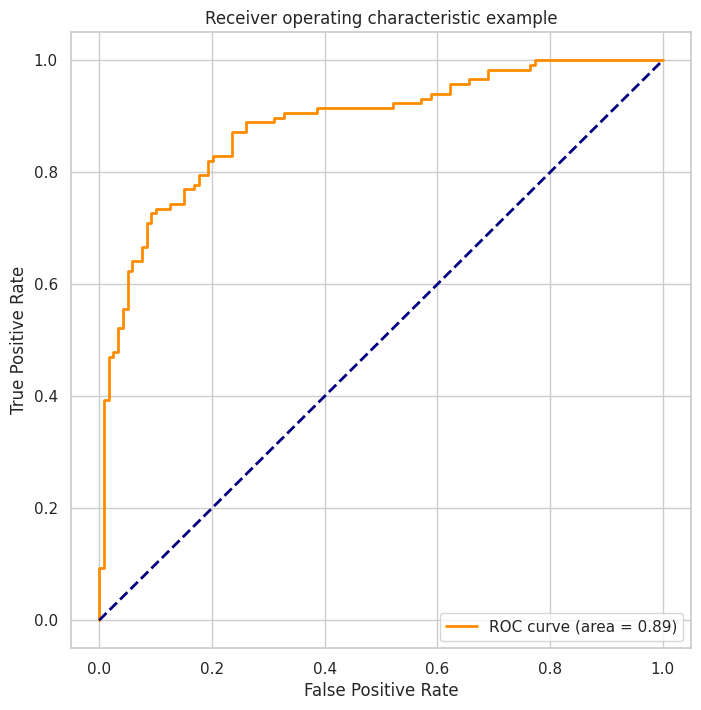

In [25]:
PlotROC(tpr,fpr,auc,8,2)

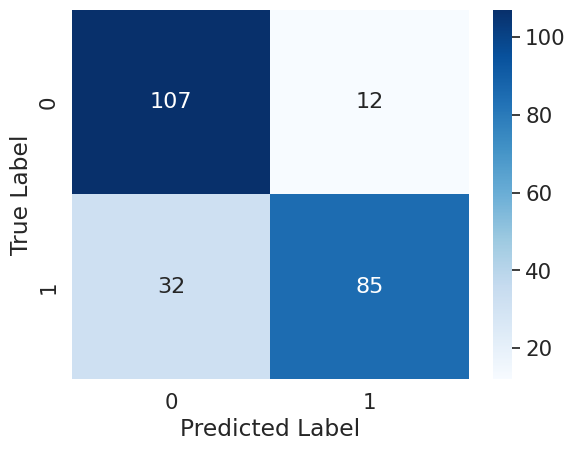

In [26]:
PlotConfusionMatrix(y_test,pred)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       119
           1       0.88      0.73      0.79       117

    accuracy                           0.81       236
   macro avg       0.82      0.81      0.81       236
weighted avg       0.82      0.81      0.81       236



# GridSearch

In [28]:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logreg__C': np.logspace(-4, 4, 4),}

In [29]:
grid = GridSearchCV(pipeline, param_grid, n_jobs=-1,cv=10,verbose=3,scoring='roc_auc')
scores = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [30]:
scores.best_score_

0.889244132535665

In [31]:
scores.best_params_

{'logreg__C': 0.046415888336127774, 'pca__n_components': 15}

# CrossValidation

In [32]:
pipeline2 = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components=8)),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1, C=10000.0))])

In [33]:
cv_results = cross_validate(pipeline2, X_train, y_train, cv=10, verbose=2, n_jobs=-1,scoring='roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [34]:
cv_results

{'fit_time': array([0.04902673, 0.01753569, 0.01684403, 0.01892114, 0.0448966 ,
        0.02534318, 0.02065682, 0.02494311, 0.03405952, 0.0293479 ]),
 'score_time': array([0.02538276, 0.00838828, 0.00540423, 0.00549173, 0.01581383,
        0.01911497, 0.01223516, 0.01547956, 0.01388073, 0.00805163]),
 'test_score': array([0.88617886, 0.87344685, 0.88564815, 0.85694444, 0.9287037 ,
        0.86805556, 0.79814815, 0.8787037 , 0.92546296, 0.79583333])}

In [35]:
np.mean(cv_results['test_score'])

0.8697125709464641

# Refit

In [36]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components=8)),
                ('scl', RobustScaler()),
                ('logreg',
                 LogisticRegression(C=10000.0, max_iter=10000, tol=0.1))])

In [37]:
pred_proba2 = pipeline2.predict_proba(X_test)
pred2 = pipeline2.predict(X_test)

In [38]:
fpr2, tpr2, auc2 = GetRocCurve(y_test,pred_proba2[:,1])

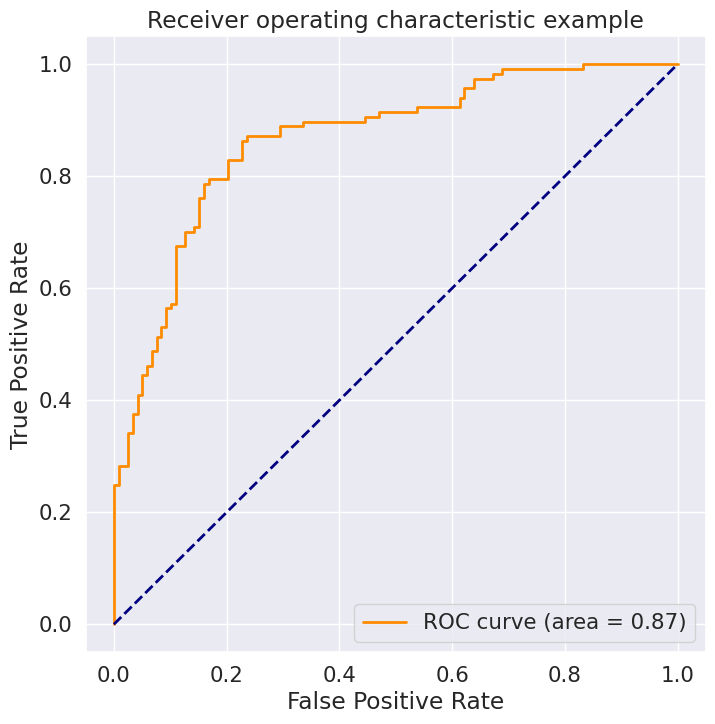

In [39]:
PlotROC(tpr2,fpr2,auc2,8,2)

In [40]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

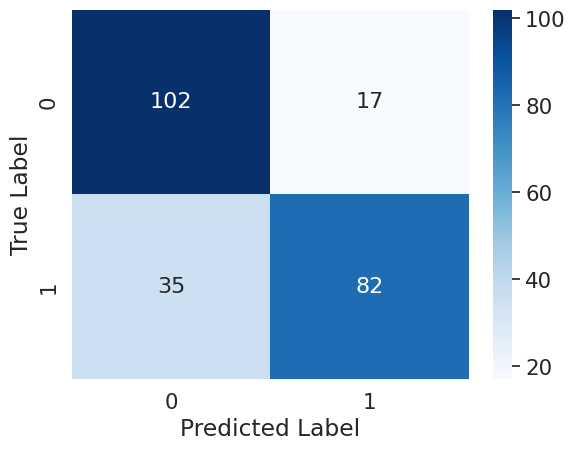

In [41]:
PlotConfusionMatrix(y_test,pred2)

In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       119
           1       0.83      0.70      0.76       117

    accuracy                           0.78       236
   macro avg       0.79      0.78      0.78       236
weighted avg       0.79      0.78      0.78       236

